# Probabilidad y Estadística para Inteligencia Artificial

## Examen Final

## Referencias

- [Cheatsheet de Latex](https://www.caam.rice.edu/~heinken/latex/symbols.pdf)

## Comentarios sobre el estado del documento



## Importar librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

import seaborn as sns
import itertools

import scipy.stats as stats
np.random.seed(42)

%matplotlib inline

## Enunciados de los Problemas

### Ejercicio 1.
Una máquina que produce fósforos tiene una proporción de defecto aleatoria de 1%. 
(a) Encontrar la máxima cantidad de fósforos, N, que se pueden ensamblar en una misma caja de manera tal que la probabilidad de tener uno o más fósforos defectuosos sea menor a 0,5. 
(b) Encontrar el valor esperado y el desv ́ıo estándar de la cantidad de fósforos defectuosos para el N calculado en el punto (a). 
(c) Simular el experimento y verificar los resultados obtenidos en los puntos (a) y (b). Comparar con los resultados teóricos esperados. 

#### Resolución

p = 0.01

Asumo que la producción de cáda fósforo tiene una probabilidad estimada $\hat p$ y cada fósforo se tendrá una distribución iid.

Consecuentemente, el proceso industrial estará caracterizado por una binomial de parámetros $\hat p$ = 0.01 de fallar. La distribución binomial tiene la siguiente forma:

${\displaystyle f(k,n,\hat p)=\Pr(k;n,\hat p)=\Pr(X=k)={\binom {n}{k}}\hat p^{k}(1-\hat p)^{n-k}}$

Por otro lado, teniendo en cuenta que con n >>> 0, la binomial tiende a una normal y según el TCL, puedo asumir que la distribución se comportará como una normal de parámetros $\mu = np$, $\sigma = \sqrt{\frac{\hat p.(1-\hat p)}{n}}$. Esto podría simplificar las cuentas para hallar el N y evitará que tengamos que acudir a un método numérico. Sin embargo, como el valor de N no será >>> 0, no optaremos por la resolución a través del TCL. Por ello, recurrimos a un método iterativo para hallar el N que satisface la condición propuesta por a.

a) 

El ejericio pide que la cantidad de fósforos por caja sea la correspondiente para que la probabilidad de que haya fósforos defectuosos sea del 50%. Lo que es lo mismo, que haya una probabilidad de 0.5 de que no haya fósforos defectuosos. Para hallar N, debo encontrar la binomial cuya pmf evaluada en 0 arrojará un 50% de probabilidad.

${\displaystyle f(k,n,\hat p)=\Pr(0;n,0.01)=\Pr(X=0)={\binom {n}{0}}0.01^{0}(1-0.01)^{n}} = 0.5 $

Resolviendo la ecuación, arroja:

$n = ln(99)/ln(0.5) = 68.9 => n = 69 $

Confirmamos el resultado utilizando la binomial de parámetros n = 69 y p = 0.01. 

b)
La media será la media y desvío característicos de la binomial serán:
$\mu = n.p = 69 . 0.01 = 0.69; \sigma =  \sqrt{\frac{p.(1-p)}{n}} =  \sqrt{0.01.(0.99)*69} = 0.826  $

c) Las simulaciones arrojan resultados consistentes (VER ABAJO)

In [3]:
print(f'A. La cantidad de fósforos n será de {np.log(0.5)/np.log(0.99):.3}')

bino = stats.binom(69, 0.01)

print(f'La probabilidad de que haya 1 o más fósforos será de {1 - bino.pmf(0):.3}\n\n')

print(f'B. El desvío estándar será de:{(0.01*0.99*69)**0.5:.3} \n\n')

##################################
######### SIMULACIÓN #############
##################################

N_EXPERIMENTS = 10000
N_matchboxes = 100
prob_array = []
media_fallas = []
for i in range(N_EXPERIMENTS):
    fail_matches_in_box = np.random.random([N_matchboxes, 69]) <= 0.01
    amount_fails = np.sum(fail_matches_in_box, axis=1)
    sum_boxes_w_fail = np.sum(amount_fails > 0)
    prob = sum_boxes_w_fail / N_matchboxes
    media_fallas.append(amount_fails)
    prob_array.append(prob)

print(f'C. RESULTADO SIMULACIÓN \n La simulación del experimento arroja una probabilidad de {np.mean(prob_array):.4} de que haya más de 1 fósforo con fallas\n \
La media de la cantidad de fallas es {np.mean(media_fallas)} y la desviación estandar es de {np.var(media_fallas)**0.5:.2} ')


A. La cantidad de fósforos n será de 69.0
La probabilidad de que haya 1 o más fósforos será de 0.5


B. El desvío estándar será de:0.826 


C. RESULTADO SIMULACIÓN 
 La simulación del experimento arroja una probabilidad de 0.5006 de que haya más de 1 fósforo con fallas
 La media de la cantidad de fallas es 0.690253 y la desviación estandar es de 0.83 


### Ejercicio 2. 
Sea X una variable aleatoria con función de densidad de probabilidad (pdf) fX(x) = kx, si 0 ≤ x ≤ 3, 
y fX(x) = 0 si no. 
(a) Encontrar el valor de k. 
(b) Encontrar x1 tal que P(X ≤ x1)=0,1. 
(c) Simular la variable aleatoria X usando el método de la transformada inversa. 
(d) A partir de la variable X generada, estimar – mediante simulaciones – la pdf de X usando método de densidad de kernel con función de kernel Gaussiana. 

#### Resolución
a)
Toda función de densidad de probabilidad debe integrar 1 de -inf a +inf. Utilizamos esta propiedad para determinar k.

$\int_{-\infty}^\infty f(x) dx = \int_{0}^3 k.x dx = \frac{k.x^2}/2 |^3_0 = \frac{k.3^2}/2 = 1 $

Resolviendo la ecuación, k queda igual a 2/9.

$f(x) = 2x/9 $ para todo x en 0-3.

b) 
Para hallar x1 tal que P(X <= x1 ) = 0,1, debo encotnrar la $F^{-1}(X)$. 

Para ello, primero calculo la función de distribución:


$F(X = x) = \int_{-\infty}^\infty f(x) dx = \int_{0}^x 2.x/9 dx = \frac{2.x^2}{9} |^x_0 = \frac{x^2}{9}$

La función $F^{-1}(X)$ estará dada entonces por:

De -inf a 0, $F^-1(X < 0) = 0$, de 0 a 3 quedará  $F^-1(X = x) = \sqrt{9.F(X = x)} $ y $F^-1(X > 3) = 1$.

Consecuentemente, reemplazando en la expresión, P(X ≤ x1)=0,1 estará dada por x1 = 0.949.

c) Simulo la V.A. con el método de la transformada inversa. 

VER ABAJO


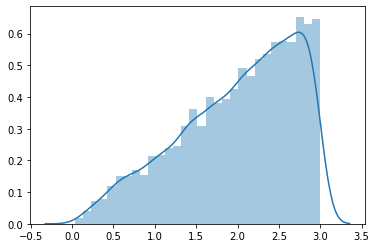

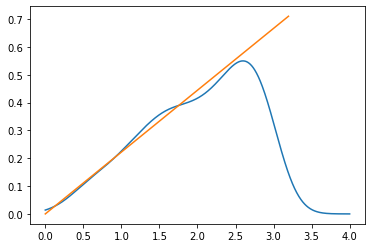

In [4]:
# C.

##################################
######### SIMULACIÓN #############
##################################

SIZE = 10000
U = np.random.random(SIZE)

X = (9 * U)**0.5

sns.distplot(X)
plt.show()

# Estimación de Kernel GAUSIANA!
M = 1000
h = 0.25
n = 1000
x_mean = 0

x_min = 0
x_max = 4

kern = np.linspace(x_min, x_max, M + 1)

K_fin = np.zeros(shape = kern.shape)

for i in range(n):
    K = stats.norm(loc=X[i], scale=h).pdf((kern))
    K_fin = K_fin + K
K_fin = K_fin/(n)

plt.plot(kern, K_fin)
plt.plot(kern[:800], 2 * kern[:800] /9)
plt.show()


### Ejercicio 3.
Sea X1,X2,...,X10 una muestra aleatoria de una población con distribución normal con media μ y desvıo estándar 4. Sea $\hat X$ la media muestral. Se mide $\hat X$ = 48. Se tiene la hipótesis nula H0 : μ = 45, y la hipótesis alternativa H1 : μ = 45. 
(a) Encontrar un intervalo de confianza del 95% de μ. 
(b) Justificar si hay suficiente evidencia para rechazar la hipótesis nula con un 5% de significancia. 
(c) Simular el experimento y verificar los resultados obtenidos en los puntos (a) y (b). 

#### Resolución

$\mu = \mu ; \hat X = 48$ 

$\sigma = 4 $

H0: $\mu = 45 $

H1: $\mu \neq 45 $

**a.** Para encontrar un intervalo de confianza, del 95% de $\mu$ debo utilizar la expresión: 

$ 0.95 = P(\mu_1 < X < \mu_2)  $

Para hallar los mu que acotarán el intervalo de confianza, normailizo la experesión anterior.

$ P(\mu_1 < X < \mu_2) =  P(Z_{\alpha/2} < \frac{x - \mu}{\sigma} < Z_{1 - \alpha/2}) = P(x + Z_{\alpha/2}*\sigma < \mu < x + Z_{1 - \alpha/2}*\sigma) $

Reemplazando:

$x - Z_{\alpha/2}*\sigma > \mu > x + Z_{1 - \alpha/2}*\sigma = 48 - 1.96 * 4 < \mu < 48 + 1.96 * 4 => 48 - 1.96 * 4 < \mu < 48 + 1.96 * 4 => 40.16 < \mu < 55.8  $

El intervalo de confianza del 95% es de 40.2 < $\mu$ < 55.8.

**b.** Para evaluar si es razonable rechazar la hipótesis nula, se supone que la H0 es cierta y se analiza si la media muestral hallada se encuentra por fuera del 95% de significancia. De ser así, permitiría suponer que hay información suficiente para rechazar la H0.

Para encontrar el valor de $\mu_{95\%} =  \mu + Z_{0.95}*\sigma = 45 + (1.6448 * 4) = 51.57 $

Dado que 51.57 > 48, se deduce que hay un nivel de significancia menor al 95% y consiguientemente, no hay información suficiente para rechazar la hipótesis nula.

**c.**SIMULACIÓN, VER ABAJO



In [9]:
print(f'El mu_0.025 es de: {stats.norm.interval(.95)[0] * 4 +48:.3} y el mu_0.975 es de: {stats.norm.interval(.95)[1] * 4 +48:.3}')

print(f'Valor de mu_95%: {stats.norm.interval(.90)[1] * 4 + 45:.3}')

##################################
######### SIMULACIÓN #############
##################################

proporcion_dentro_intervalo = []
proporcion_mayor_48 = []
for i in range(N_EXPERIMENTS):
    muestras = np.random.normal(48, 4, size=SIZE)
    mask_95 = np.logical_and((40.2 < muestras), (muestras < 55.8))
    proporcion_dentro_intervalo.append(np.sum(mask_95) / len(mask_95))
       
    muestras = np.random.normal(45, 4, size=SIZE)
    mask_mayor_48 = (muestras > 48)
    proporcion_mayor_48.append(np.sum(mask_mayor_48) / len(mask_mayor_48))

print('\n\n ##### SIMULACIÓN ####### \n')
    
print(f'La proporción de muestras dentro del intervalo de confianza \n\
del 95% encontrado son: {np.mean(proporcion_dentro_intervalo):.3}. \n\
Dado que el valor es muy cercano a 95%, podemos afirmar que la \n\
simulación y los resultados analíticos son congruentes.\n')

print(f'El nivel de significancia simulado tomando mu = 45 y \n\
teniendo una media muestral de 48 es de: {np.mean(proporcion_mayor_48):.3}  \n\
Se puede concluir que el nivel de significancia no es suficiente \n\
para rechazar la hipótesis nula.')

El mu_0.025 es de: 40.2 y el mu_0.975 es de: 55.8
Valor de mu_95%: 51.6


 ##### SIMULACIÓN ####### 

La proporción de muestras dentro del intervalo de confianza 
del 95% encontrado son: 0.949. 
Dado que el valor es muy cercano a 95%, podemos afirmar que la 
simulación y los resultados analíticos son congruentes.

El nivel de significancia simulado tomando mu = 45 y 
teniendo una media muestral de 48 es de: 0.227  
Se puede concluir que el nivel de significancia no es suficiente 
para rechazar la hipótesis nula.
